# Title - Animal Behaviour Prediction

- **INTRODUCTION** - THE TERM ANIMAL BEHAVIOR IS COMMONLY USED TO DESCRIBE WHAT AN ANIMAL DOES DURING ITS DAILY LIFE. ANIMAL BEHAVIOR, WHEN CONSIDERED OVER APPROPRIATE PERIODS OF TIME, IS AN IMPORTANT INDICATOR OF HEALTH, WELFARE, AND PRODUCTIVITY, PARTICULARLY FOR LIVESTOCK. IT CAN ALSO PROVIDE VALUABLE INFORMATION ABOUT ANIMALS’ ENVIRONMENT, SOCIAL INTERACTIONS, AND HERD DYNAMICS. CLASSIFYING ANIMAL BEHAVIOR ON WEARABLE DEVICES, SUCH AS ACCELEROMETERS ARE COMPACT AND LOW-POWER MOTION SENSORS THAT CAN MEASURE ACCELERATION ON THREE ORTHOGONAL SPATIAL AXES. 
- ANIMALS’ BEHAVIOR HAVING DIFFERENT ACTIVITIES LIKE LYING, EATING, RUMINATING ETC. FROM THESE, RUMINATION TIME THAT COULD BE USED TO MONITOR THE HEALTH AND REPRODUCTION OF DAIRY CATTLE. IN CONCLUSION, RUMINATION TIME COULD BE USED AS AN INDICATOR OF THE HEALTH STATUS IN DAIRY CATTLE. DECREASED RUMINATION TIME HAS BEEN ASSOCIATED WITH THE STRESS, ANXIETY AND DISEASES.


- **OBJECTIVE** - HERE WE ARE HAVING ACCELEROMETER DATA ALONG WITH THREE AXES, BASED ON THESE ACCELEROMETER AXES DATA, FIRST WE NEED TO CLUSTER THE DATA IN THEIR RESPECTIVE BEHAVIOR AND AFTER THAT WE NEED TO PREDICT THE RUMINATION FOR ENCOUNTERING EARLY DISEASE USING VARIOUS MACHINE LEARNING MODEL.


In [159]:
# Importing data manipulation liabraries
import pandas as pd
import numpy as np
from scipy import stats

# Importing data visualization liabraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model building liabraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score

# Warnings
import warnings 
warnings.filterwarnings('ignore')

In [33]:
# Loading the dataset
data = pd.read_csv('C:/Users/user/Desktop/Animal_behaviour_prediction_project/Dataset_animal_behaviour_pred.csv')
data.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [34]:
# Creating dataframe
data = pd.DataFrame(data)
data.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [35]:
# Convert the 'date_column' to a datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

-  **DATA DICTIONARY**- 
   - The dataset having 14595853 rows and 4 columns.
   - TIMESTAMP: Date and time of recorded data.
   - X-AXES: Acceleration data along X-AXES. The X-AXIS is oriented paralell to the animal body (paralell to the ground)
   - Y-AXES: Acceleration data along Y-AXES. The Y-AXIS is oriented verticle to the animal body (perpendicular to the ground).
   - Z-AXES: Acceleration data along Z-AXES. The Z-AXIS is oriented perpendicular to the animal body (paralell to the ground).
   - UNIT: Acceleration unit-mili-gram force (mg)


### Analysing each axes

In [36]:
# Statistical measures
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,14595853.0,47.196270,344.656093,-1840.0,-240.0,164.0,320.0,1792.0
y,14595853.0,896.297506,201.318497,-1828.0,840.0,972.0,1016.0,1904.0
z,14595853.0,141.817101,337.173981,-2040.0,-36.0,104.0,284.0,2040.0


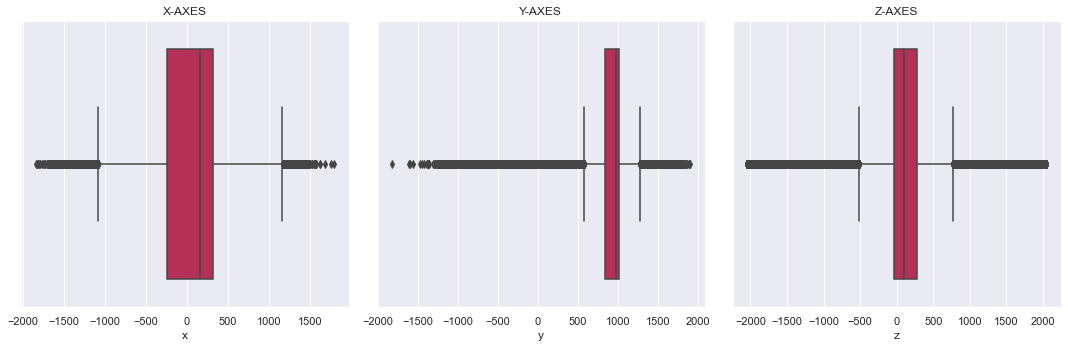

In [37]:
# Creating boxplot for each axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Box plots for X, Y, and Z axes
sns.set(style='darkgrid')
sns.boxplot(x='x', data=data, ax=axs[0],palette='rocket')
axs[0].set_title('X-AXES')

sns.boxplot(x='y', data=data, ax=axs[1],palette='rocket')
axs[1].set_title('Y-AXES')

sns.boxplot(x='z', data=data, ax=axs[2],palette='rocket')
axs[2].set_title('Z-AXES')

plt.tight_layout()
plt.show()

- A box plot, also known as a box-and-whisker plot, It provides a visual summary of the distribution of a dataset, revealing key characteristics such as the central tendency, spread, and the presence of outliers.
- X-AXES readings are concentrated between -240 and 320 
- Y-AXES readings are concentrated between 840 and 1016
- Z-AXES readings are concentrated between -36 and 284
- Conclusion- X-Axes has maximum acceleration as compare to Y and Z axes.

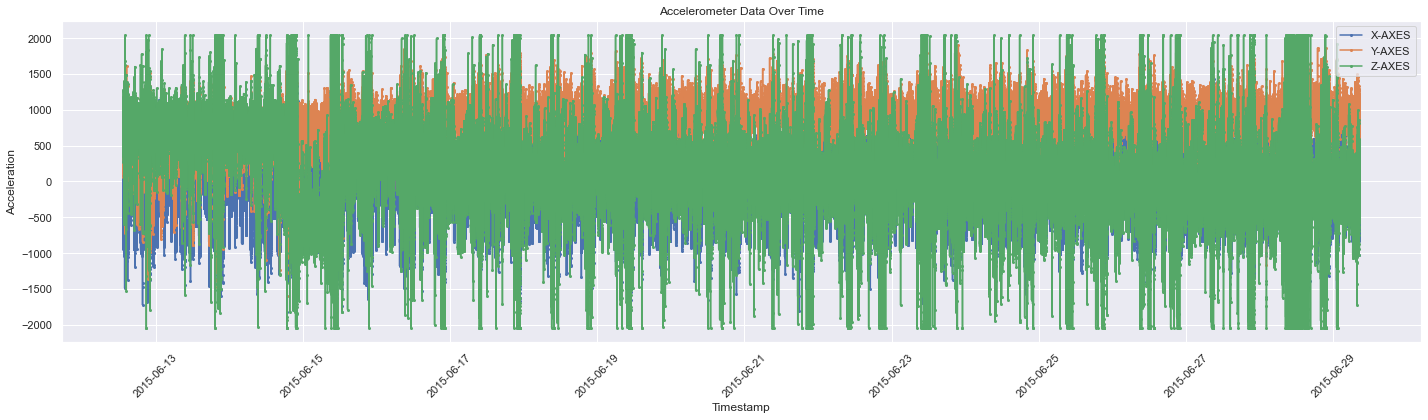

In [38]:
# Plot all three axes using the index as the timestamp
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['x'], label='X-AXES', linestyle='-', marker='o', markersize=2)
plt.plot(data.index, data['y'], label='Y-AXES', linestyle='-', marker='o', markersize=2)
plt.plot(data.index, data['z'], label='Z-AXES', linestyle='-', marker='o', markersize=2)
plt.title('Accelerometer Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating the time windows

In [40]:
# Creating the time windows of 3S 
frame_1=data.resample('3S').mean()
frame_1.head()

,x,y,z
timestamp,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655
2015-06-12 13:30:03,-88.400000,579.066667,843.200000
2015-06-12 13:30:06,-684.400000,412.000000,662.000000
2015-06-12 13:30:09,-795.741935,343.870968,562.838710
2015-06-12 13:30:12,-724.933333,390.800000,621.333333


- Time windows of 3 seconds using the mean is a concept used for time-based data analysis. This approach involves creating time intervals or windows around the mean value of a time series data set.
- Compute the mean value of the time series data. The mean represents a central reference point within the data.
- Create time intervals or windows around the mean, with each window spanning 3 seconds in duration. 

In [42]:
# Reset the index to convert the datetime to column
frame_windows = frame_1.reset_index()
frame_windows_1 = frame_windows.rename(columns={'timestamp': 'Timestamp'})
df_resampled=pd.DataFrame(frame_windows_1)
df_resampled.head()

,Timestamp,x,y,z
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333


- By resetting the index, we can work with the datetime values as a regular data column, making it easier to perform various operations, such as filtering, grouping, and visualization, without the datetime values serving as the index.

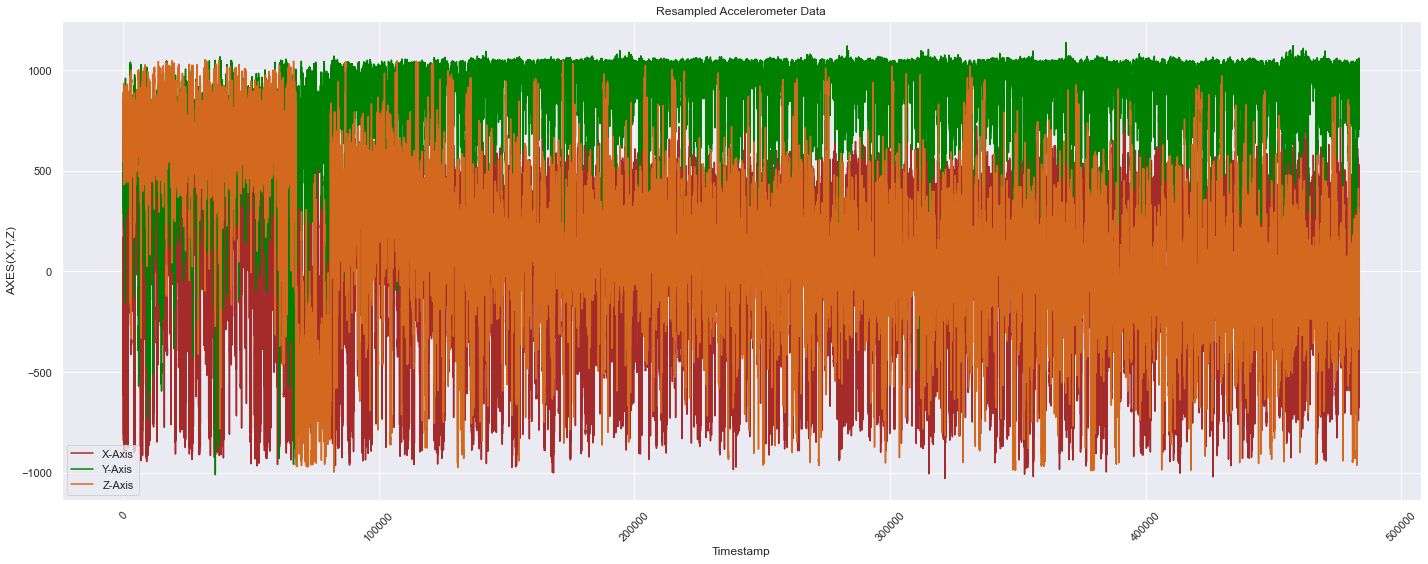

In [46]:
# Extracting the resampled data
timestamp_resampled = df_resampled.index
x_resampled_data = df_resampled['x']
y_resampled_data = df_resampled['y']
z_resampled_data = df_resampled['z']

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(20,8))

# Plot 'x', 'y', and 'z' data against the resampled 'timestamp'
ax.plot(timestamp_resampled, x_resampled_data, label='X-Axis', color='brown')
ax.plot(timestamp_resampled, y_resampled_data, label='Y-Axis', color='green')
ax.plot(timestamp_resampled, z_resampled_data, label='Z-Axis', color='chocolate')
ax.set_xlabel('Timestamp')
ax.set_ylabel('AXES(X,Y,Z)')
ax.set_title('Resampled Accelerometer Data')
ax.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

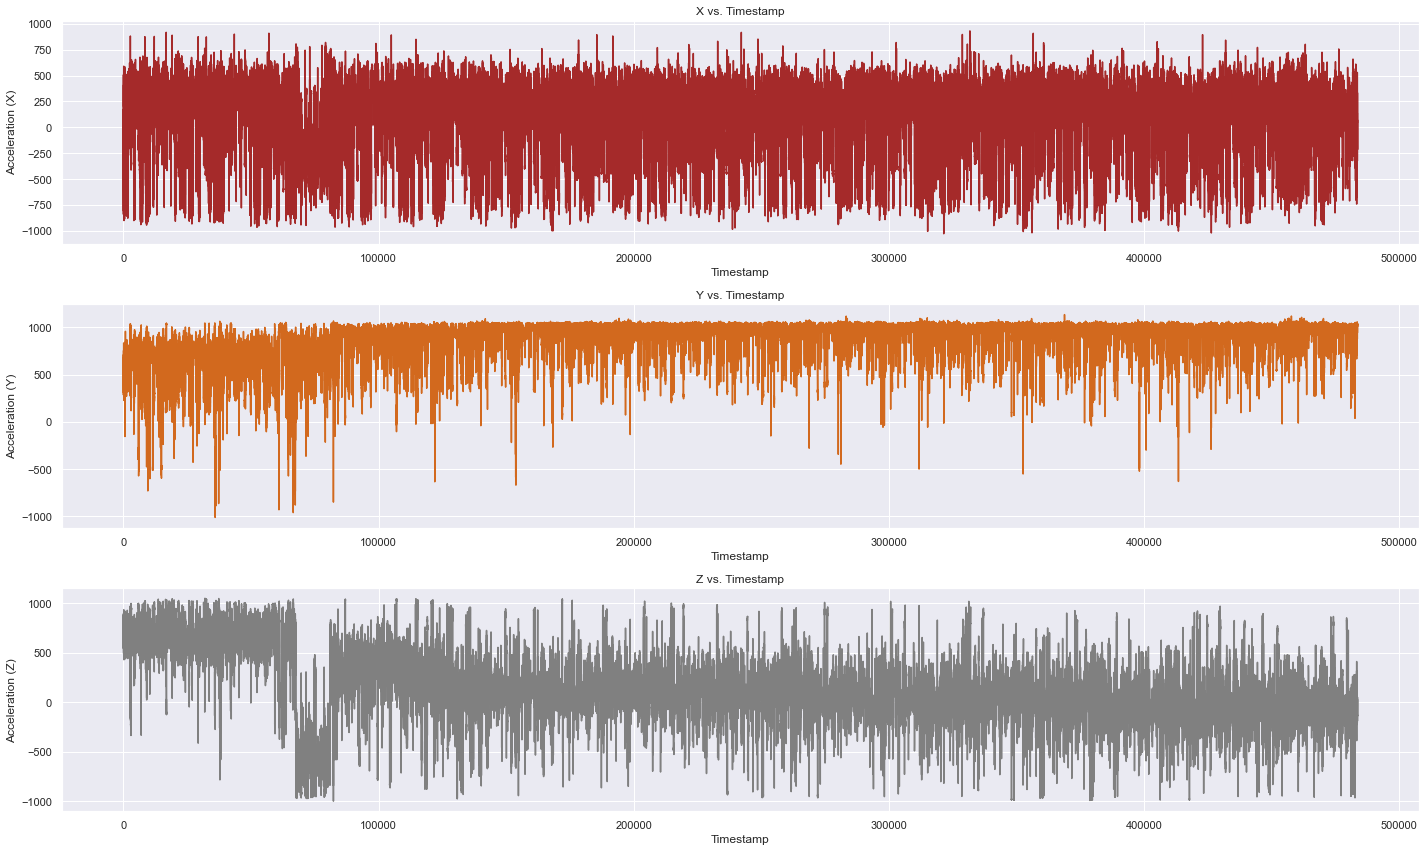

In [49]:
plt.figure(figsize=(20, 12))

# Plot 'x' column
sns.set(style='darkgrid')
plt.subplot(3, 1, 1)
plt.plot(df_resampled.index, df_resampled['x'], color='brown')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (X)')
plt.title('X vs. Timestamp')

# Plot 'y' column
plt.subplot(3, 1, 2)
plt.plot(df_resampled.index, df_resampled['y'], color='chocolate')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (Y)')
plt.title('Y vs. Timestamp')

# Plot 'z' column
plt.subplot(3, 1, 3)
plt.plot(df_resampled.index, df_resampled['z'], color='gray')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (Z)')
plt.title('Z vs. Timestamp')

plt.tight_layout()
plt.show()

- By visualizing each axes we are getting idea about the speard of data points.
- X-axes has maximum spread. Y-axes is more concentrated than X and Z.

# Feature Extraction

In [55]:
# Assuming df_resampled_3s1 is your DataFrame
df_resampled['RMS'] = np.sqrt((df_resampled['x']**2 + df_resampled['y']**2 + df_resampled['z']**2)/3)

In [56]:
# Assuming df_resampled_3s1 is your DataFrame
df_resampled['Magnitude'] = np.sqrt(df_resampled['x']**2 + df_resampled['y']**2 + df_resampled['z']**2)

In [52]:
# Calculating the mean for each row 
df_resampled['mean'] = np.mean(df_resampled[['x', 'y', 'z']], axis=1)

In [53]:
# Calculating the standard deviation 
df_resampled['std'] = np.std(df_resampled[['x', 'y', 'z']], axis=1)

In [57]:
df_resampled

,Timestamp,x,y,z,mean,std,RMS,Magnitude
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655,530.344828,294.799657,606.772176,1050.960238
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,444.622222,392.025613,592.767241,1026.702978
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,129.866667,584.749321,598.996761,1037.492824
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,36.989247,595.576827,596.724359,1033.556909
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,95.733333,587.881359,595.625187,1031.653086
...,...,...,...,...,...,...,...,...
483595,2015-06-29 08:29:45,-1.290323,1037.935484,-128.258065,302.795699,522.400280,603.810639,1045.830706
483596,2015-06-29 08:29:48,-35.200000,1036.000000,-124.266667,292.177778,527.217123,602.765085,1044.019753
483597,2015-06-29 08:29:51,-2.266667,1033.466667,-134.266667,298.977778,522.150327,601.688188,1042.154512
483598,2015-06-29 08:29:54,33.733333,1037.866667,-138.666667,310.977778,518.784498,604.850836,1047.632378


- After creating the 3S time windows we will go for feature extraction. Within each time window, extract relevant features that capture the characteristics of interest. These features can be used as inputs for various analysis tasks. In this project we have tried multiple features like mean (x, y, z axes), Std (x, y, z axes), RMS, Magnitude. Here mean and Std are statistical features. And RMS, Magnitude are time domain features
- Extracted features-
     - 1. Mean = ΣX / N
     - 2. Standard Deviation (σ) = √ [(Σ (xi – μ )²) / N]
     - 3. RMS (Root Mean Square) = sqrt ((x1^2 + x2^2 + x3^2 + ... + xn^2) / n)
     - 4. Magnitude = sqrt (x^2 + y^2 + z^2)

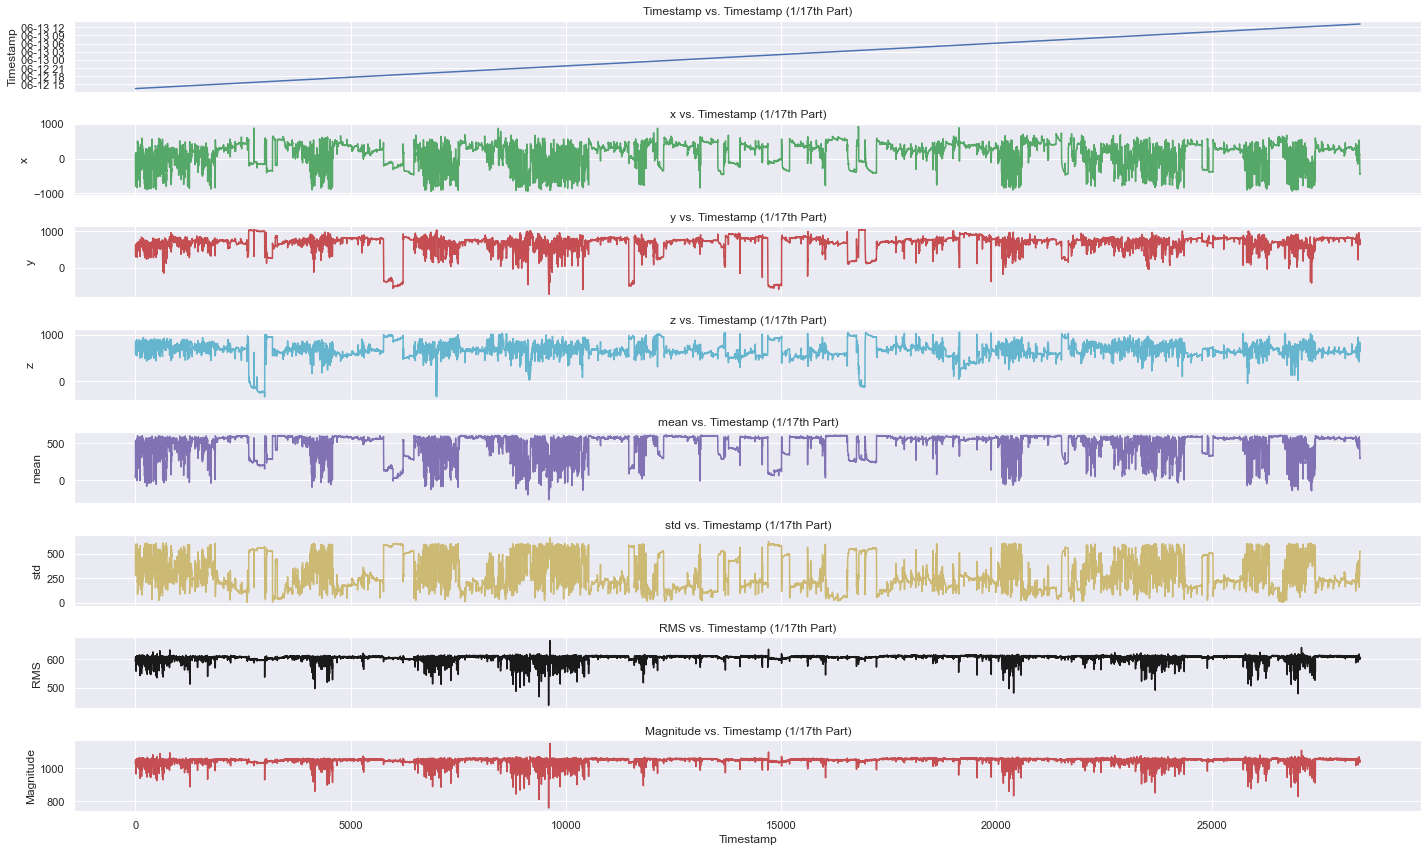

In [81]:
# Calculate the index range for the 1/17th part of the data
total_data_points = len(df_resampled)
fraction = 1/17
start_index = 0
end_index = int(total_data_points * fraction)

# Create separate subplots for each column
fig, axes = plt.subplots(len(df_resampled.columns), 1, figsize=(20, 12), sharex=True)

# Define a list of colors for the plots
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','r']

# Iterate through the columns and assign a color to each plot
for i, (column, color) in enumerate(zip(df_resampled.columns, colors)):
    axes[i].plot(df_resampled.index[start_index:end_index], df_resampled[column][start_index:end_index], color=color)
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} vs. Timestamp (1/17th Part)')

# Add an x-axis label to the last subplot
axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()

- We are able to identify patterns in RMS and Magnitude. 
- After visualising each feature, we get the clarity that we have to drop mean and Std and we have to continue with RMS and Magnitude. 

In [82]:
# Dropping the std column
df_resampled= df_resampled.drop('std', axis=1, inplace=False)

,Timestamp,x,y,z,mean,RMS,Magnitude
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655,530.344828,606.772176,1050.960238
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,444.622222,592.767241,1026.702978
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,129.866667,598.996761,1037.492824
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,36.989247,596.724359,1033.556909
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,95.733333,595.625187,1031.653086
...,...,...,...,...,...,...,...
483595,2015-06-29 08:29:45,-1.290323,1037.935484,-128.258065,302.795699,603.810639,1045.830706
483596,2015-06-29 08:29:48,-35.200000,1036.000000,-124.266667,292.177778,602.765085,1044.019753
483597,2015-06-29 08:29:51,-2.266667,1033.466667,-134.266667,298.977778,601.688188,1042.154512
483598,2015-06-29 08:29:54,33.733333,1037.866667,-138.666667,310.977778,604.850836,1047.632378


In [83]:
# Dropping the mean column
df_resampled= df_resampled.drop('mean', axis=1, inplace=False)

In [84]:
df_resampled

,Timestamp,x,y,z,RMS,Magnitude
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655,606.772176,1050.960238
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,592.767241,1026.702978
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,598.996761,1037.492824
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,596.724359,1033.556909
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,595.625187,1031.653086
...,...,...,...,...,...,...
483595,2015-06-29 08:29:45,-1.290323,1037.935484,-128.258065,603.810639,1045.830706
483596,2015-06-29 08:29:48,-35.200000,1036.000000,-124.266667,602.765085,1044.019753
483597,2015-06-29 08:29:51,-2.266667,1033.466667,-134.266667,601.688188,1042.154512
483598,2015-06-29 08:29:54,33.733333,1037.866667,-138.666667,604.850836,1047.632378


### Scaling the data

In [97]:
# Extract the 'Timestamp' column
timestamps = df_resampled['Timestamp']

# Remove the 'Timestamp' column from the DataFrame
df = df_resampled.drop(columns=['Timestamp'])

# Get the column names for later use
column_names = df.columns

# Perform feature scaling (standardization) on the remaining columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data and add the 'Timestamp' column back
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

# Add the 'Timestamp' column back to the DataFrame
scaled_df.insert(0, 'Timestamp', timestamps)
scaled_df

,Timestamp,x,y,z,RMS,Magnitude
0,2015-06-12 13:30:00,0.262323,-1.451084,2.118353,0.396782,0.396782
1,2015-06-12 13:30:03,-0.400575,-1.609818,2.113863,-0.886218,-0.886218
2,2015-06-12 13:30:06,-2.161215,-2.457667,1.567712,-0.315528,-0.315528
3,2015-06-12 13:30:09,-2.490130,-2.803416,1.268832,-0.523704,-0.523704
4,2015-06-12 13:30:12,-2.280954,-2.565255,1.445140,-0.624400,-0.624400
...,...,...,...,...,...,...
483595,2015-06-29 08:29:45,-0.143245,0.718902,-0.814187,0.125474,0.125474
483596,2015-06-29 08:29:48,-0.243418,0.709080,-0.802157,0.029690,0.029690
483597,2015-06-29 08:29:51,-0.146129,0.696223,-0.832297,-0.068965,-0.068965
483598,2015-06-29 08:29:54,-0.039782,0.718553,-0.845559,0.220767,0.220767


- Scaling makes it easier to compare and interpret the impact of different features on a model. It ensures that all features have a common scale with a mean of 0 and a standard deviation of 1. This is often referred to as standardization or z-score scaling.

# Performing PCA (Principle Component Analysis)

In [98]:
# Columns on which we have to apply PCA 
X = scaled_df[['x', 'y', 'z','RMS','Magnitude']]

# Assigning the no. of components
n_components = 2
pca = PCA(n_components=n_components)

# Fitting the PCA model and transforming the data into the new feature 
X_pca = pca.fit_transform(X)

# Creating a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.shape

(483600, 2)

- Principal Component Analysis (PCA) is a dimensionality reduction technique and a fundamental tool in data analysis.
- Principal Component Analysis (PCA) is commonly used in combination with k-means clustering for various reasons. PCA helps improve the performance of k-means clustering by addressing issues related to high dimensionality.
- Here we are transforming [x, y, z, RMS, Magnitude] columns to 2 Principle components. So that we can apply K-means to get clusters. 

In [99]:
# Merge with previous dataset
pc_df = pd.DataFrame(pca_df)
timestamp_df = pd.DataFrame(df_resampled[['Timestamp','x','y','z','RMS','Magnitude']])

# Merge DataFrames based on the common identifier column 
merged_df = pc_df.merge(timestamp_df, left_index=True, right_index=True)
merged_df

,PC1,PC2,Timestamp,x,y,z,RMS,Magnitude
0,-0.621082,2.467754,2015-06-12 13:30:00,136.000000,610.344828,844.689655,606.772176,1050.960238
1,1.221862,2.434295,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,592.767241,1026.702978
2,1.678103,3.129733,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,598.996761,1037.492824
3,2.223028,3.166730,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,596.724359,1033.556909
4,2.147522,3.069201,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,595.625187,1031.653086
...,...,...,...,...,...,...,...,...
483595,-0.111756,-0.978207,2015-06-29 08:29:45,-1.290323,1037.935484,-128.258065,603.810639,1045.830706
483596,0.045350,-0.961057,2015-06-29 08:29:48,-35.200000,1036.000000,-124.266667,602.765085,1044.019753
483597,0.127236,-1.019890,2015-06-29 08:29:51,-2.266667,1033.466667,-134.266667,601.688188,1042.154512
483598,-0.263064,-1.003649,2015-06-29 08:29:54,33.733333,1037.866667,-138.666667,604.850836,1047.632378


# K-Means 

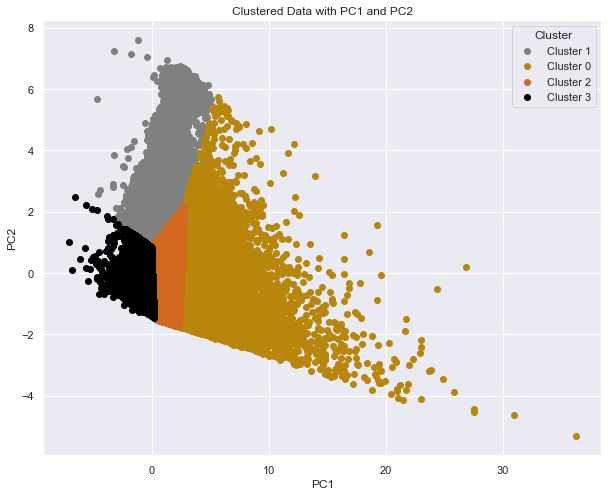

In [100]:
# Select 'PC1' and 'PC2' as your features for clustering
X = merged_df[['PC1', 'PC2']]

# The number of clusters you want to create
K = 4

# Create a K-means model
kmeans = KMeans(n_clusters=K, init='random', n_init=10, random_state=0)

# Fit the model to your data
kmeans.fit(X)

# Add the cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_

# colors for each cluster
custom_colors = ['gray', 'darkgoldenrod', 'chocolate', 'black'] 

# Create a scatter plot with custom colors for each cluster
plt.figure(figsize=(10, 8))
for cluster_label, color in zip(merged_df['Cluster'].unique(), custom_colors):
    cluster_data = merged_df[merged_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}', color=color)

# Adding a legend based on the 'Cluster' column
plt.legend(title='Cluster')
plt.title('Clustered Data with PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- K-Means Clustering Algorithm is unsupervised algorithm used to group the data points in clusters based on similar data points.
- We have to divide data points into 4 clusters. So, the value of ‘k’ is already known. 

- Percentage of data points in Cluster 0: 9 %
- Percentage of data points in Cluster 1: 14 %
- Percentage of data points in Cluster 2: 20 %
- Percentage of data points in Cluster 3: 57 %

In [101]:
# List of columns to drop
columns_to_drop = merged_df[['PC1', 'PC2']]

# Drop the specified columns
merged_df.drop(columns=columns_to_drop, inplace=True) 
merged_df

,Timestamp,x,y,z,RMS,Magnitude,Cluster
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655,606.772176,1050.960238,1
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,592.767241,1026.702978,1
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,598.996761,1037.492824,1
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,596.724359,1033.556909,1
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,595.625187,1031.653086,1
...,...,...,...,...,...,...,...
483595,2015-06-29 08:29:45,-1.290323,1037.935484,-128.258065,603.810639,1045.830706,3
483596,2015-06-29 08:29:48,-35.200000,1036.000000,-124.266667,602.765085,1044.019753,3
483597,2015-06-29 08:29:51,-2.266667,1033.466667,-134.266667,601.688188,1042.154512,3
483598,2015-06-29 08:29:54,33.733333,1037.866667,-138.666667,604.850836,1047.632378,3


## Cluster-0 (Other_activities)

In [103]:
# Extract data points for a particular cluster 
target_cluster = 0

# new DataFrame containing only data points for the target cluster
merged_df_0 = merged_df[merged_df['Cluster'] == target_cluster]
merged_df_0.head()

,Timestamp,x,y,z,RMS,Magnitude,Cluster
13,2015-06-12 13:30:39,-633.866667,411.733333,602.000000,557.887470,966.289444,0
14,2015-06-12 13:30:42,-696.266667,378.533333,574.533333,565.144025,978.858165,0
83,2015-06-12 13:34:09,-617.066667,453.066667,640.133333,576.139844,997.903482,0
105,2015-06-12 13:35:15,-809.466667,306.800000,494.266667,575.517756,996.825994,0
106,2015-06-12 13:35:18,-451.483871,487.870968,735.096774,572.195489,991.071660,0


In [105]:
# Statistical measures
merged_df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
x,42974.0,-370.690025,296.317831,-1025.066667,-581.733333,-431.066667,-179.500000,896.516129
y,42974.0,689.106065,215.569957,-968.000000,606.400000,741.866667,824.266667,1004.129032
z,42974.0,-306.165174,398.444325,-997.066667,-581.200000,-360.393548,0.258065,975.333333
RMS,42974.0,576.871303,15.271090,274.332837,574.641733,581.092508,584.637113,600.313864
Magnitude,42974.0,999.170406,26.450304,475.158413,995.308678,1006.481747,1012.621184,1039.774112
Cluster,42974.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


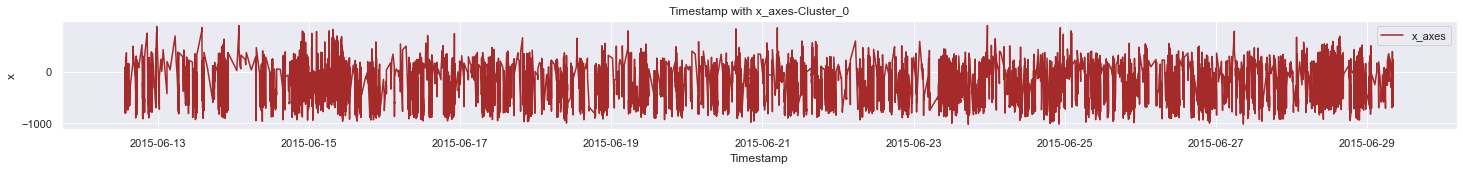

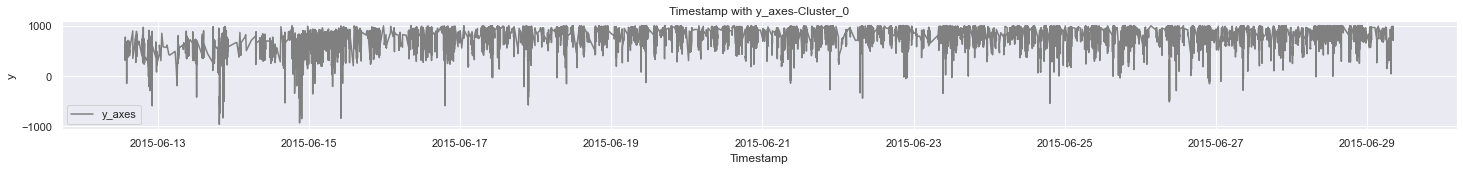

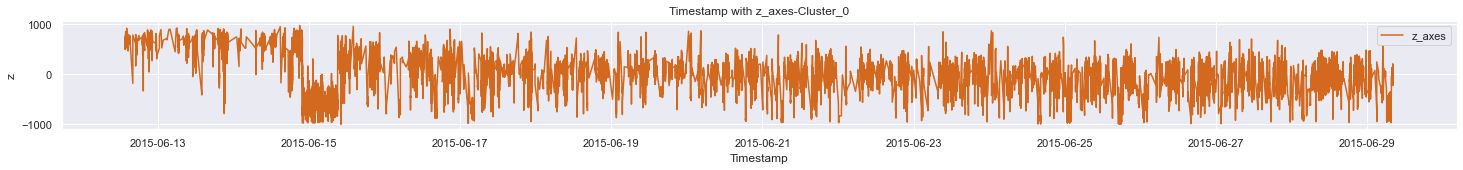

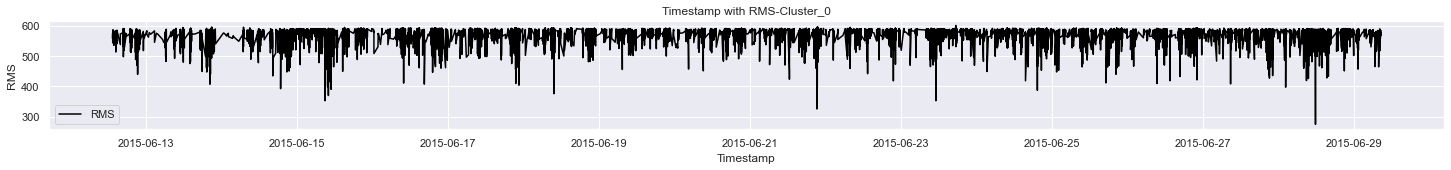

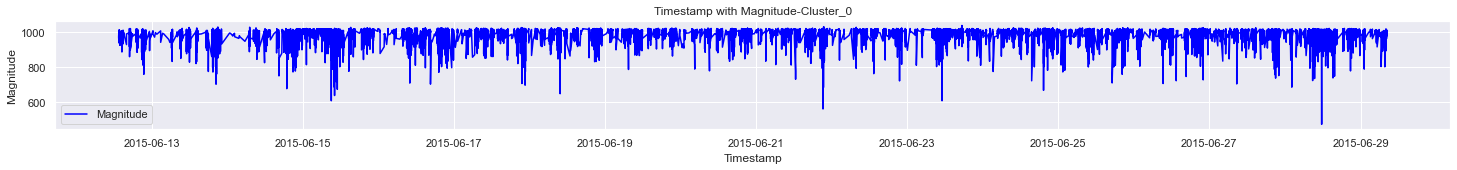

In [106]:
# Cluster_0
# Convert the 'Timestamp' column to datetime format
merged_df_0['Timestamp'] = pd.to_datetime(merged_df_0['Timestamp'])

# Create a line plot of 'x'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_0['Timestamp'], merged_df_0['x'], label='x_axes',color='brown')
plt.title('Timestamp with x_axes-Cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('x')
plt.legend()
plt.grid(True)

# Create a line plot of 'y'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_0['Timestamp'], merged_df_0['y'], label='y_axes',color='gray')
plt.title('Timestamp with y_axes-Cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Create a line plot of 'z'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_0['Timestamp'], merged_df_0['z'], label='z_axes',color='chocolate')
plt.title('Timestamp with z_axes-Cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('z')
plt.legend()
plt.grid(True)

# Create a line plot of 'RMS'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_0['Timestamp'], merged_df_0['RMS'], label='RMS',color='black')
plt.title('Timestamp with RMS-Cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('RMS')
plt.legend()
plt.grid(True)

# Create a line plot of 'Magnitude'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_0['Timestamp'], merged_df_0['Magnitude'], label='Magnitude',color='blue')
plt.title('Timestamp with Magnitude-Cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

## Cluster-1 (Standing)

In [107]:
# Extract data points for a particular cluster 
target_cluster = 1

# new DataFrame containing only data points for the target cluster
merged_df_1 = merged_df[merged_df['Cluster'] == target_cluster]
merged_df_1.head()

,Timestamp,x,y,z,RMS,Magnitude,Cluster
0,2015-06-12 13:30:00,136.000000,610.344828,844.689655,606.772176,1050.960238,1
1,2015-06-12 13:30:03,-88.400000,579.066667,843.200000,592.767241,1026.702978,1
2,2015-06-12 13:30:06,-684.400000,412.000000,662.000000,598.996761,1037.492824,1
3,2015-06-12 13:30:09,-795.741935,343.870968,562.838710,596.724359,1033.556909,1
4,2015-06-12 13:30:12,-724.933333,390.800000,621.333333,595.625187,1031.653086,1


In [108]:
# Statistical measures
merged_df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,68457.0,-45.718119,375.504234,-1028.266667,-357.600000,-44.903226,289.677419,917.066667
y,68457.0,590.225948,256.458887,-1009.866667,499.600000,676.258065,756.266667,916.000000
z,68457.0,724.919198,134.937402,-265.677419,634.133333,705.200000,812.645161,1051.466667
RMS,68457.0,605.768092,5.135593,570.425686,603.058019,606.512825,609.618972,664.546987
Magnitude,68457.0,1049.221113,8.895107,988.006271,1044.527130,1050.511029,1055.891033,1151.029146
Cluster,68457.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


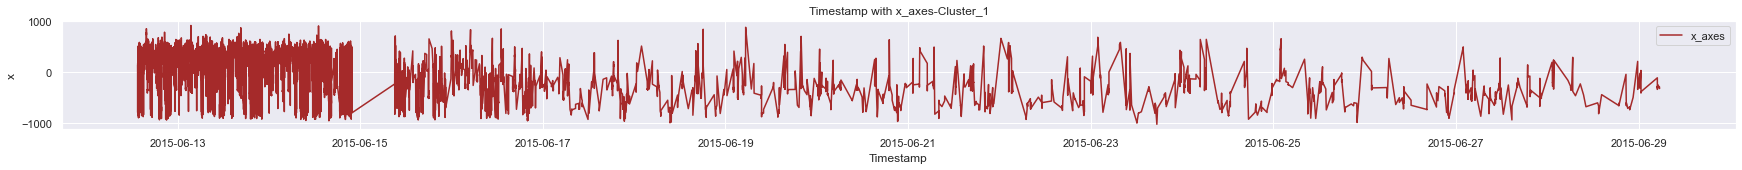

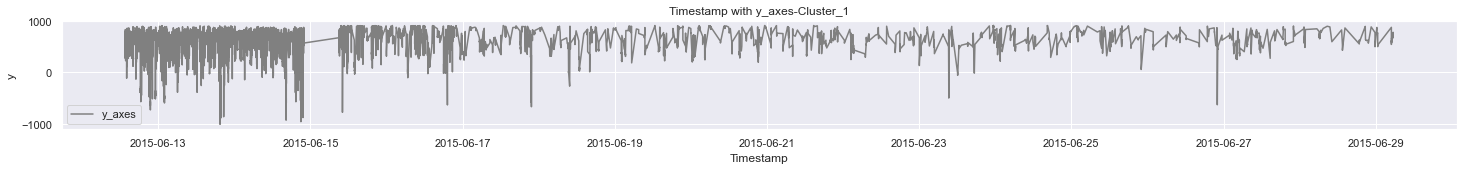

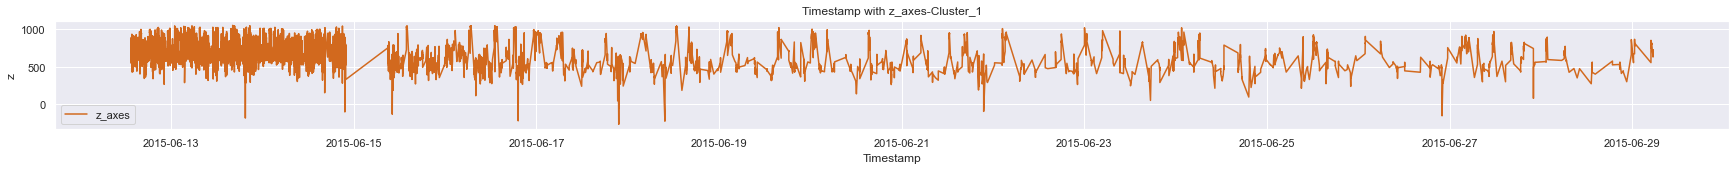

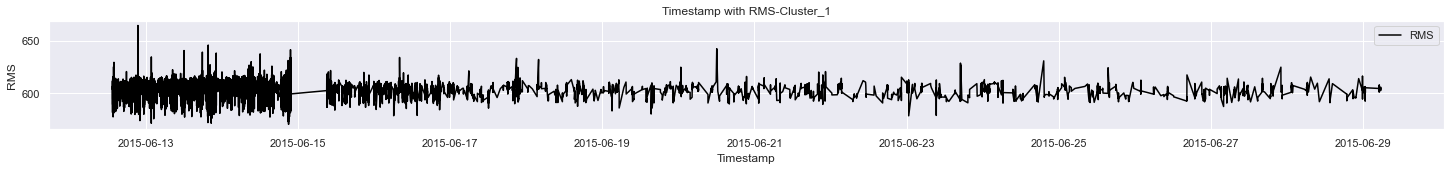

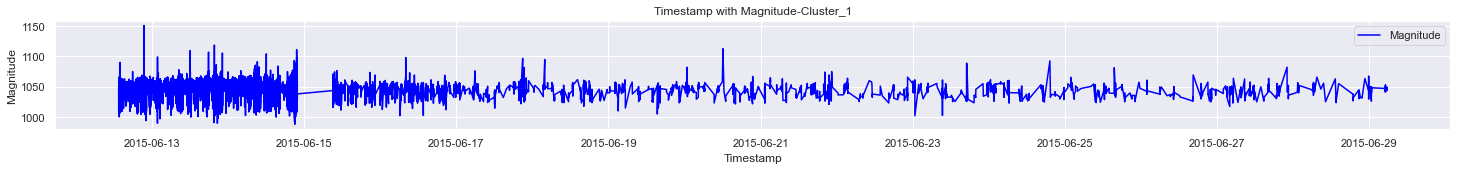

In [109]:
# Cluster_1
# Convert the 'Timestamp' column to datetime format
merged_df_1['Timestamp'] = pd.to_datetime(merged_df_1['Timestamp'])

# Create a line plot of 'x'
plt.figure(figsize=(30, 2))
plt.plot(merged_df_1['Timestamp'], merged_df_1['x'], label='x_axes',color='brown')
plt.title('Timestamp with x_axes-Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('x')
plt.legend()
plt.grid(True)

# Create a line plot of 'y'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_1['Timestamp'], merged_df_1['y'], label='y_axes',color='gray')
plt.title('Timestamp with y_axes-Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Create a line plot of 'z'
plt.figure(figsize=(30, 2))
plt.plot(merged_df_1['Timestamp'], merged_df_1['z'], label='z_axes',color='chocolate')
plt.title('Timestamp with z_axes-Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('z')
plt.legend()
plt.grid(True)

# Create a line plot of 'RMS'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_1['Timestamp'], merged_df_1['RMS'], label='RMS',color='black')
plt.title('Timestamp with RMS-Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('RMS')
plt.legend()
plt.grid(True)

# Create a line plot of 'Magnitude'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_1['Timestamp'], merged_df_1['Magnitude'], label='Magnitude',color='blue')
plt.title('Timestamp with Magnitude-Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

## Cluster-2 (Eating)

In [111]:
# Extract data points for a particular cluster 
target_cluster = 2

# new DataFrame containing only data points for the target cluster
merged_df_2 = merged_df[merged_df['Cluster'] == target_cluster]
merged_df_2.head()

,Timestamp,x,y,z,RMS,Magnitude,Cluster
37,2015-06-12 13:31:51,109.200000,629.466667,781.600000,582.824011,1009.480799,2
154,2015-06-12 13:37:42,382.064516,701.419355,611.741935,580.858733,1006.076837,2
207,2015-06-12 13:40:21,-276.666667,594.266667,764.533333,581.437452,1007.079209,2
440,2015-06-12 13:52:00,-38.400000,737.200000,705.333333,589.472507,1020.996333,2
472,2015-06-12 13:53:36,-102.451613,670.709677,739.096774,579.255800,1003.300476,2


In [112]:
# Statistical Measures
merged_df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,97097.0,-278.661450,236.615254,-896.133333,-439.333333,-319.066667,-152.800000,930.709677
y,97097.0,937.328680,83.311584,223.733333,896.645161,953.466667,1001.333333,1040.903226
z,97097.0,53.639390,209.728860,-905.333333,-55.600000,65.733333,178.666667,815.600000
RMS,97097.0,596.086189,4.861470,573.881926,592.752130,596.842859,599.885964,612.555949
Magnitude,97097.0,1032.451565,8.420313,993.992653,1026.676805,1033.762156,1039.032969,1060.978026
Cluster,97097.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


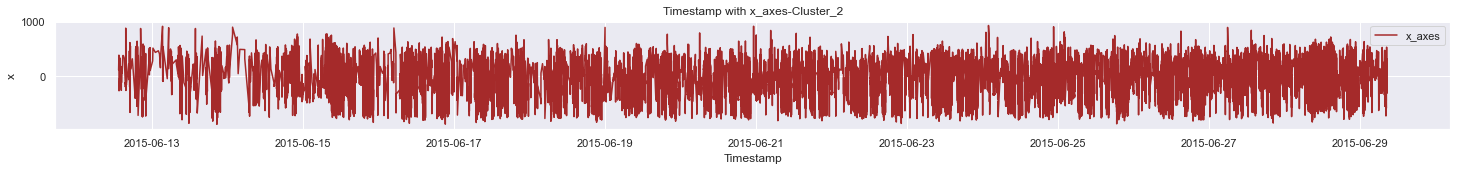

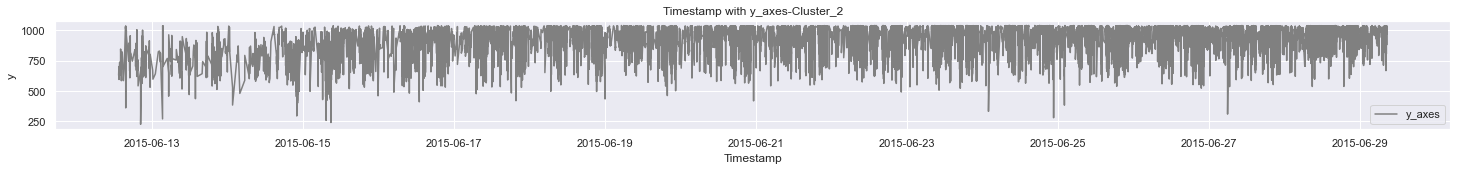

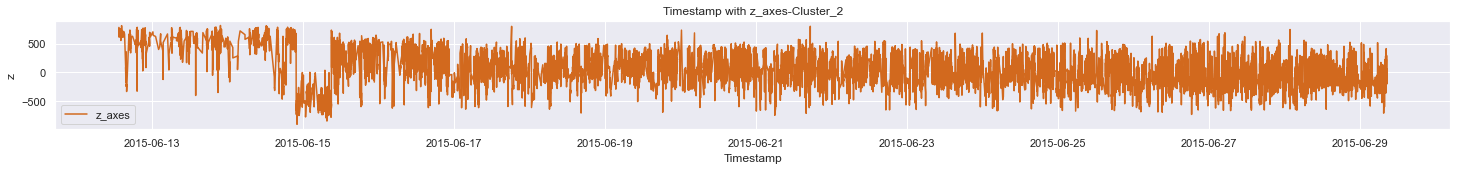

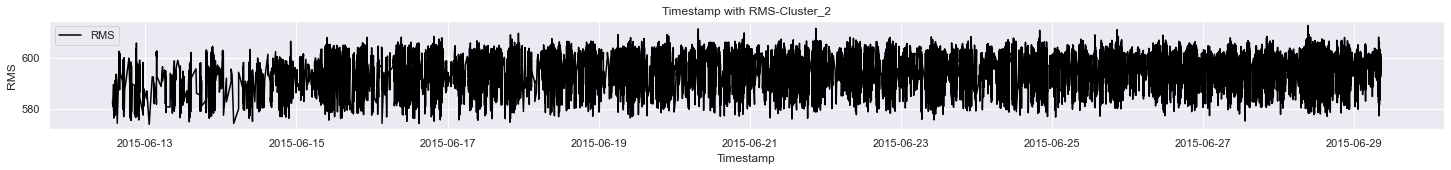

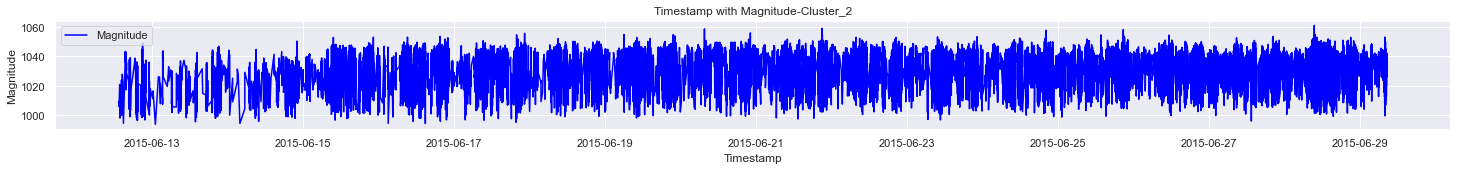

In [113]:
# Cluster_2
# Convert the 'Timestamp' column to datetime format
merged_df_2['Timestamp'] = pd.to_datetime(merged_df_2['Timestamp'])

# Create a line plot of 'x'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_2['Timestamp'], merged_df_2['x'], label='x_axes',color='brown')
plt.title('Timestamp with x_axes-Cluster_2')
plt.xlabel('Timestamp')
plt.ylabel('x')
plt.legend()
plt.grid(True)

# Create a line plot of 'y'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_2['Timestamp'], merged_df_2['y'], label='y_axes',color='gray')
plt.title('Timestamp with y_axes-Cluster_2')
plt.xlabel('Timestamp')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Create a line plot of 'z'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_2['Timestamp'], merged_df_2['z'], label='z_axes',color='chocolate')
plt.title('Timestamp with z_axes-Cluster_2')
plt.xlabel('Timestamp')
plt.ylabel('z')
plt.legend()
plt.grid(True)

# Create a line plot of 'RMS'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_2['Timestamp'], merged_df_2['RMS'], label='RMS',color='black')
plt.title('Timestamp with RMS-Cluster_2')
plt.xlabel('Timestamp')
plt.ylabel('RMS')
plt.legend()
plt.grid(True)

# Create a line plot of 'Magnitude'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_2['Timestamp'], merged_df_2['Magnitude'], label='Magnitude',color='blue')
plt.title('Timestamp with Magnitude-Cluster_2')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

## Cluster-3 (Rumination)

In [114]:
# Extract data points for a particular cluster 
target_cluster = 3

# new DataFrame containing only data points for the target cluster
merged_df_3 = merged_df[merged_df['Cluster'] == target_cluster]
merged_df_3.head()

,Timestamp,x,y,z,RMS,Magnitude,Cluster
155,2015-06-12 13:37:45,589.866667,702.800000,515.466667,607.611830,1052.414561,3
156,2015-06-12 13:37:48,514.266667,771.466667,509.466667,610.788372,1057.916493,3
157,2015-06-12 13:37:51,458.000000,798.933333,515.333333,609.269211,1055.285229,3
796,2015-06-12 14:09:48,305.733333,825.866667,650.266667,632.027257,1094.703321,3
820,2015-06-12 14:11:00,154.533333,896.800000,531.600000,608.476061,1053.911453,3


In [115]:
# Statistical Measures
merged_df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,97097.0,-278.661450,236.615254,-896.133333,-439.333333,-319.066667,-152.800000,930.709677
y,97097.0,937.328680,83.311584,223.733333,896.645161,953.466667,1001.333333,1040.903226
z,97097.0,53.639390,209.728860,-905.333333,-55.600000,65.733333,178.666667,815.600000
RMS,97097.0,596.086189,4.861470,573.881926,592.752130,596.842859,599.885964,612.555949
Magnitude,97097.0,1032.451565,8.420313,993.992653,1026.676805,1033.762156,1039.032969,1060.978026
Cluster,97097.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


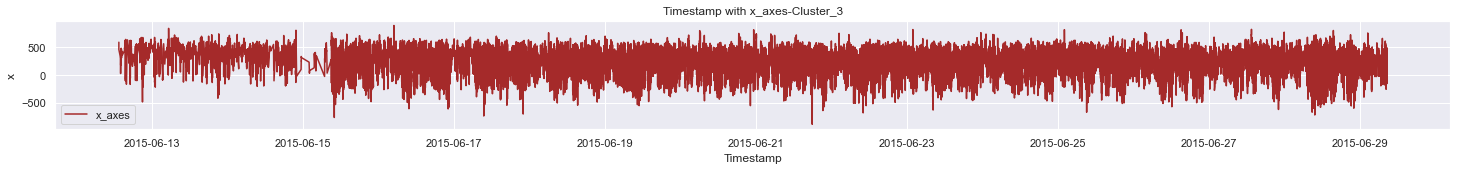

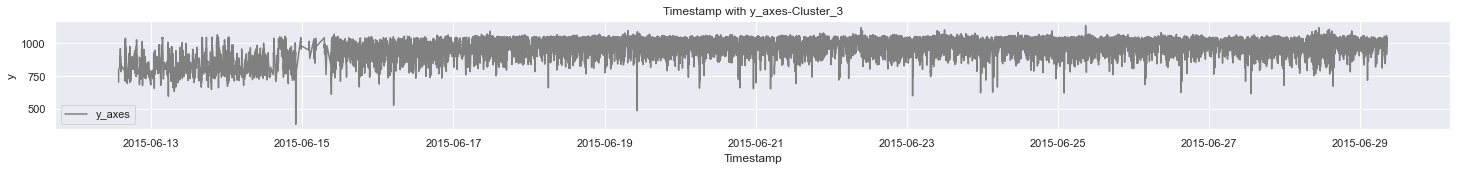

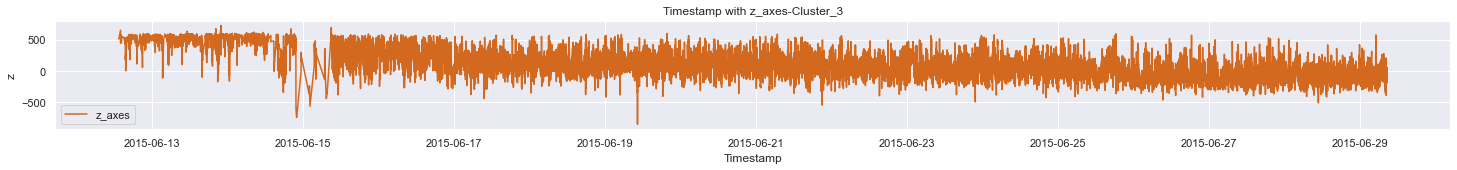

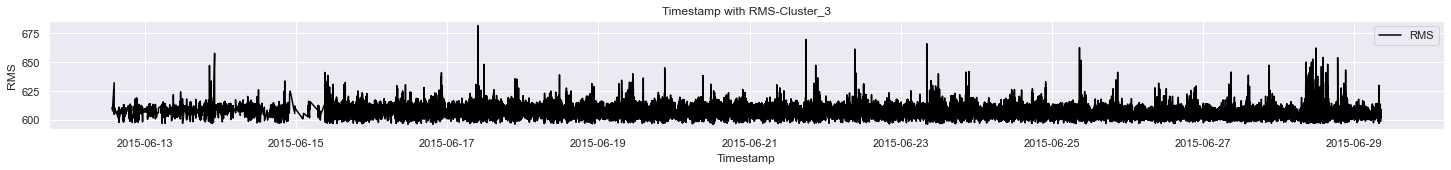

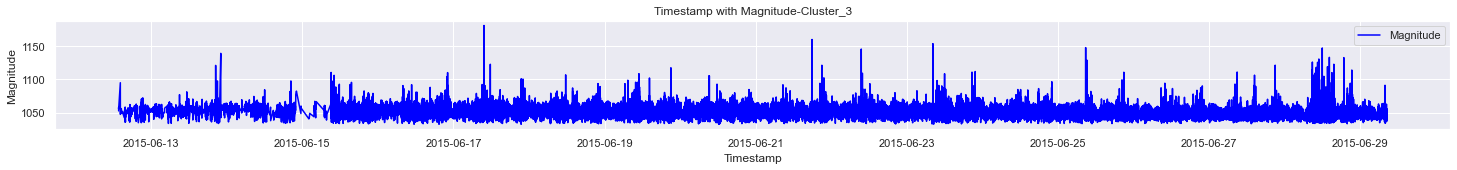

In [116]:
# Cluster_3
# Convert the 'Timestamp' column to datetime format
merged_df_3['Timestamp'] = pd.to_datetime(merged_df_3['Timestamp'])

# Create a line plot of 'x'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_3['Timestamp'], merged_df_3['x'], label='x_axes',color='brown')
plt.title('Timestamp with x_axes-Cluster_3')
plt.xlabel('Timestamp')
plt.ylabel('x')
plt.legend()
plt.grid(True)

# Create a line plot of 'y'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_3['Timestamp'], merged_df_3['y'], label='y_axes',color='gray')
plt.title('Timestamp with y_axes-Cluster_3')
plt.xlabel('Timestamp')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Create a line plot of 'z'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_3['Timestamp'], merged_df_3['z'], label='z_axes',color='chocolate')
plt.title('Timestamp with z_axes-Cluster_3')
plt.xlabel('Timestamp')
plt.ylabel('z')
plt.legend()
plt.grid(True)

# Create a line plot of 'RMS'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_3['Timestamp'], merged_df_3['RMS'], label='RMS',color='black')
plt.title('Timestamp with RMS-Cluster_3')
plt.xlabel('Timestamp')
plt.ylabel('RMS')
plt.legend()
plt.grid(True)

# Create a line plot of 'Magnitude'
plt.figure(figsize=(25, 2))
plt.plot(merged_df_3['Timestamp'], merged_df_3['Magnitude'], label='Magnitude',color='blue')
plt.title('Timestamp with Magnitude-Cluster_3')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

In [124]:
# Calculating % of each cluster
print('Percentage of data points in Cluster 0:',round((len(merged_df_0)/483600)*100))
print('Percentage of data points in Cluster 1:',round((len(merged_df_1)/483600)*100))
print('Percentage of data points in Cluster 2:',round((len(merged_df_2)/483600)*100))
print('Percentage of data points in Cluster 3:',round((len(merged_df_3)/483600)*100))

Percentage of data points in Cluster 0: 9
Percentage of data points in Cluster 1: 14
Percentage of data points in Cluster 2: 20
Percentage of data points in Cluster 3: 57


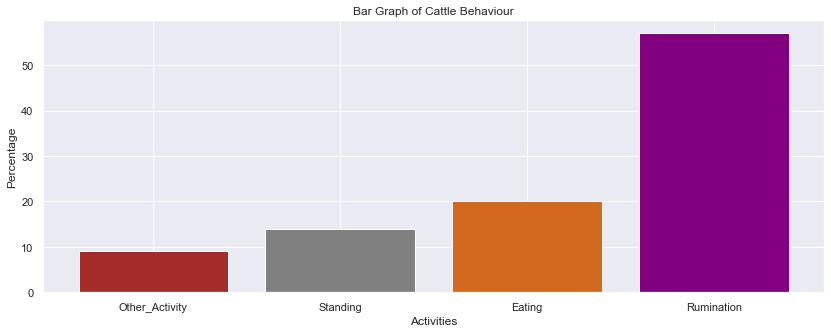

In [134]:
# Data for the bars
categories = ['Other_Activity','Standing','Eating', 'Rumination']
values = [ 9, 14, 20, 57]

# Adding labels and a title
plt.figure(figsize=(14,5))
bar_colors = ['brown', 'gray', 'chocolate', 'purple']
plt.bar(categories, values, color=bar_colors)
plt.xlabel('Activities')
plt.ylabel('Percentage')
plt.title('Bar Graph of Cattle Behaviour')
plt.show()

- After getting the clusters the important task is to label the clusters and is the difficult task it requires a lot of statistical analysis and opinion from domain expert. In this task we have to identify the clusters for 4 activities namely Rumination, Standing, Other Activities and Eating. To identify the clusters, we will use the domain knowledge like the detail study of the x, y and z axes. While Ruminating cattle will be in steady position there will be less movement across all axes. While performing other activities like running, walking, etc. movement in all axes will be maximum. In such way we can identify the activities of cattle. By visualizing each axes of each cluster and by observing the median value of each axes of each cluster we can conclude that:
1.	Cluster_0 = Other Activities
2.	Cluster_1 = Standing 
3.	Cluster_2 = Eating 
4.	Cluster_3 = Rumination


# Model Building

In [137]:
# Features
features = merged_df[['x','y','z','RMS','Magnitude']]

In [138]:
# Input variables and target variables
x = features
y = merged_df['Cluster']

## Model 1: Decision Tree

In [139]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)

Decision Tree Model Accuracy: 0.9939123242349048


In [140]:
# Make predictions on the training data
y_train_pred = decision_tree.predict(x_train)

# Make predictions on the test data
y_test_pred = decision_tree.predict(x_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9939123242349048


In [142]:
# Define your hyperparameter grid to search over. 

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 20]
}

In [145]:
# Create the DecisionTreeClassifier and GridSearchCV objects
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [146]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [147]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9987344913151365


In [148]:
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Test Accuracy with Best Hyperparameters: 0.9987096774193548


- We will calculate Accuracy score, Precision, Recall, F1 score. For each model the number of True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN) has been established. Accuracy = (TP + TN)/ (TP + FP + FN + TN), which gives us an overall measure of correctly identified behaviors. Precision = TP/ (TP + FP), Recall = TP / (TP + FN), F1 score = 2 (Precision * Recall) / (Precision + Recall).                                             

Number of samples in x_train: 241800
Number of samples in x_test: 241800
Number of samples in y_train: 241800
Number of samples in y_test: 241800


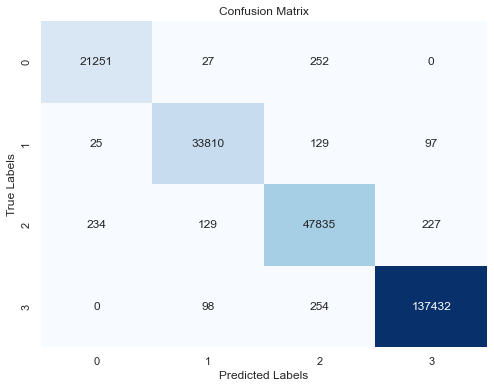

In [149]:
# Check data splitting
print("Number of samples in x_train:", len(x_train))
print("Number of samples in x_test:", len(x_test))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in y_test:", len(y_test))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [150]:
# Generate and Print a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21530
           1       0.99      0.99      0.99     34061
           2       0.99      0.99      0.99     48425
           3       1.00      1.00      1.00    137784

    accuracy                           0.99    241800
   macro avg       0.99      0.99      0.99    241800
weighted avg       0.99      0.99      0.99    241800



In [152]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.9939135865830601
Recall: 0.9939123242349048
F1-Score: 0.9939128876326226


In [153]:
# 4. Feature Importance
feature_importance = decision_tree.feature_importances_
print("Feature Importance:")
print(feature_importance)

Feature Importance:
[0.08339738 0.02632917 0.36079946 0.49264623 0.03682774]


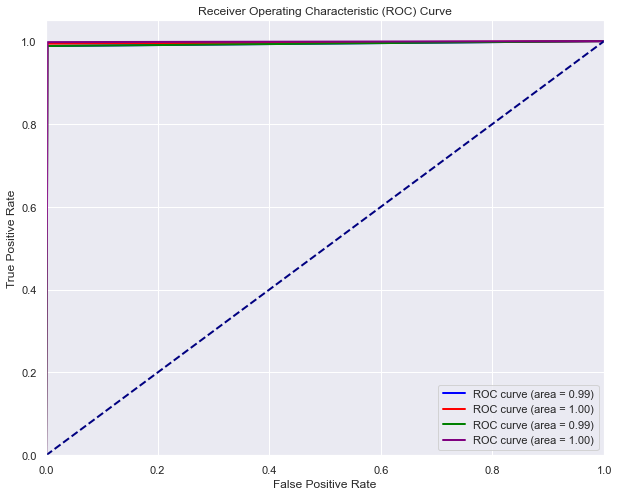

AUC (Area Under the Curve) for Class 0: 0.99
AUC (Area Under the Curve) for Class 1: 1.00
AUC (Area Under the Curve) for Class 2: 0.99
AUC (Area Under the Curve) for Class 3: 1.00


In [160]:
# Binarize the target variable for multi-class classification
y_bin = label_binarize(y, classes=[0, 1, 2, 3])  

x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.3, random_state=42)

# Create a OneVsRestClassifier with Logistic Regression
model = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the model on the training data
model.fit(x_train, y_train)

y_prob = model.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
n_classes = len(y_bin[0])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC (Area Under the Curve) for each class
for i in range(n_classes):
    print("AUC (Area Under the Curve) for Class {}: {:.2f}".format(i, roc_auc[i]))

- After completing confusion matrix analysis we will go for Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC). ROC and AUC are essential tools in the field of machine learning and classification. These matrix offer valuable insights into the performance of classification models and their ability to distinguish between positive and negative class.
- Let’s get overview of ACU values and what can we derive from that value. If we are getting the value of (AUC = 1) it is considered as a ideal model. Which means value obtained in our analysis demonstrates exceptional discriminatory power of our classification model. 
- When (AUC = 0.5)  we can say that the ability of model to discriminate between the positive and negative classes is equivalent to flipping a coin. This indicates that our model has lack predictive power and need more refinement.
- When (AUC = 0) it is considered as worse model. This score indicates that the model is not capable of distinguishing between positive and negative class and making incorrect predictions consistently.

# Conclusion- 
    Livestock has helped farmers in strategic planning and resource management for better decision-making. Animal monitoring systems are essential tools in this context to achieve management efficiently and effectively. This Animal Behavior Prediction Project has provided valuable insights into the behavior of cattle. Through careful observation, data analysis we have un covered several findings. We have analyzed various behavioral patterns (Rumination, standing, eating, other activities). Understood the daily lives of cattle. This model will definitely help the business work. We have done all steps processing data, PCA, clustering, building machine learning models and selecting the top one model. We have built a model which help to maintain the health status of cattle.   